In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
accuracies_quadratic = []

for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.var(X_train[y_train == i], axis=0) for i in range(3)]

    # Discriminante Linear
    def linear_predict(X):
        predictions = []
        for x in X:
            class_scores = [np.dot(x - class_means[i], class_means[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Discriminante Quadrático
    def quadratic_predict(X):
        predictions = []
        for x in X:
            class_scores = [-0.5 * np.dot(np.dot((x - class_means[i]).T, np.linalg.inv(np.diag(class_variances[i]))), (x - class_means[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste
    y_pred_linear = linear_predict(X_test)
    y_pred_quadratic = quadratic_predict(X_test)

    # Calcular métricas para o discriminante linear
    accuracy_linear, std_dev_linear, conf_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append((accuracy_linear, std_dev_linear, conf_matrix_linear))

    # Calcular métricas para o discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append((accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic))

# Calcular média e desvio padrão das acurácias para o discriminante linear
mean_accuracies_linear = np.mean([acc[0] for acc in accuracies_linear])
std_accuracies_linear = np.std([acc[0] for acc in accuracies_linear])

# Calcular média e desvio padrão das acurácias para o discriminante quadrático
mean_accuracies_quadratic = np.mean([acc[0] for acc in accuracies_quadratic])
std_accuracies_quadratic = np.std([acc[0] for acc in accuracies_quadratic])

# Encontrar a melhor realização com base na acurácia mais próxima da média para o discriminante linear
best_realization_index_linear = np.argmin(np.abs([acc[0] - mean_accuracies_linear for acc in accuracies_linear]))
best_accuracy_linear, best_std_dev_linear, best_conf_matrix_linear = accuracies_linear[best_realization_index_linear]

# Encontrar a melhor realização com base na acurácia mais próxima da média para o discriminante quadrático
best_realization_index_quadratic = np.argmin(np.abs([acc[0] - mean_accuracies_quadratic for acc in accuracies_quadratic]))
best_accuracy_quadratic, best_std_dev_quadratic, best_conf_matrix_quadratic = accuracies_quadratic[best_realization_index_quadratic]

# Imprimir os resultados para o discriminante linear
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

# Imprimir os resultados para o discriminante quadrático
print("\nResultados do Discriminante Quadrático:")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)


Resultados do Discriminante Linear:
Melhor Realização: 0
Acurácia: 0.3556
Desvio Padrão: 0.4787
Matriz de Confusão:
[[16.  0.  0.]
 [13.  0.  0.]
 [15.  1.  0.]]

Resultados do Discriminante Quadrático:
Melhor Realização: 0
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[16.  0.  0.]
 [ 0. 12.  1.]
 [ 0.  1. 15.]]


Resultados do Discriminante Linear:
Melhor Realização: 1
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 14.  1.]
 [ 0.  1. 16.]]
Covariance Matrix (Complete):
[[ 0.74097985 -0.0440293   1.3676511   0.53134158]
 [-0.0440293   0.20979304 -0.35166484 -0.1265119 ]
 [ 1.3676511  -0.35166484  3.22874176  1.27435165]
 [ 0.53134158 -0.1265119   1.27435165  0.53899634]]
Covariance Matrix (Diagonal):
[[0.74097985 0.         0.         0.        ]
 [0.         0.20979304 0.         0.        ]
 [0.         0.         3.22874176 0.        ]
 [0.         0.         0.         0.53899634]]
Covariance Matrix (Equal):
[[0.62629922 0.         0.         0.        ]
 [0.         0.62629922 0.         0.        ]
 [0.         0.         0.62629922 0.        ]
 [0.         0.         0.         0.62629922]]


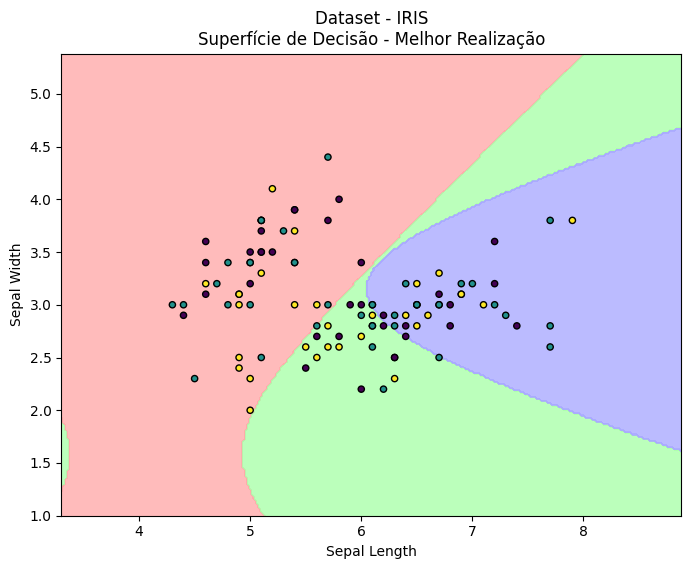

C:\Users\gleilsonpedro\AppData\Local\Temp\ipykernel_14000\226519220.py:124: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)


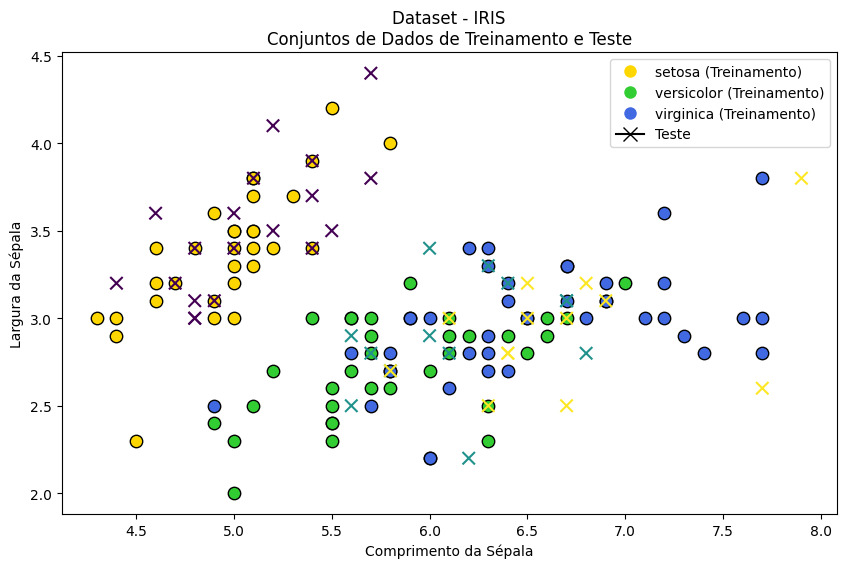

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.var(X_train[y_train == i], axis=0) for i in range(3)]

    # Função de previsão
    def predict(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste
    y_pred = predict(X_test)

    # Calcular métricas
    accuracy, std_dev, conf_matrix = calculate_metrics(y_test, y_pred)
    accuracies.append((accuracy, std_dev, conf_matrix, X_train))

# Calcular média e desvio padrão das acurácias
mean_accuracies = np.mean([acc[0] for acc in accuracies])
std_accuracies = np.std([acc[0] for acc in accuracies])

# Encontrar a melhor realização com base na acurácia mais próxima da média
best_realization_index = np.argmin(np.abs([acc[0] - mean_accuracies for acc in accuracies]))
best_accuracy, best_std_dev, best_conf_matrix, best_X_train = accuracies[best_realization_index]

# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index}")
print(f"Acurácia: {best_accuracy:.4f}")
print(f"Desvio Padrão: {best_std_dev:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix)
print("Covariance Matrix (Complete):")
print(np.cov(best_X_train.T))
print("Covariance Matrix (Diagonal):")
print(np.diag(np.diag(np.cov(best_X_train.T))))
print("Covariance Matrix (Equal):")
print(np.mean(np.cov(best_X_train.T)) * np.eye(best_X_train.shape[1]))

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, means, variances, priors, ax):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, variances, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Função de previsão
def predict(X, means, variances, priors):
    predictions = []
    for x in X:
        class_scores = [np.log(priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * variances[i]))
                        - 0.5 * np.sum(((x - means[i][:2]) ** 2) / variances[i][:2]) for i in range(3)]
        predictions.append(np.argmax(class_scores))
    return predictions

# Dados para plotagem
X_plot = best_X_train[:, :2]  # Usando apenas as duas primeiras características
y_plot = y_train

# Plotagem
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_surface(X_plot, y_plot, class_means, class_variances, class_priors, ax)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Dataset - IRIS\nSuperfície de Decisão - Melhor Realização')
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom colors for training and test points
train_colors = ['gold', 'limegreen', 'royalblue']
test_color = 'black'

def plot_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{iris.target_names[i]} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Comprimento da Sépala')
    plt.ylabel('Largura da Sépala')
    plt.title('Dataset - IRIS\nConjuntos de Dados de Treinamento e Teste')

    # Adicionando uma legenda personalizada com nomes de espécies
    custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'{iris.target_names[i]} (Treinamento)', markerfacecolor=train_colors[i], markersize=10) for i in range(3)]
    custom_lines.append(Line2D([0], [0], marker='x', color='black', label='Teste', markersize=10))
    plt.legend(handles=custom_lines, loc='upper right')

    plt.show()

# Usar a função para plotar os conjuntos de dados de treinamento e teste
plot_dataset(X_train, y_train, X_test, y_test)


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
accuracies_quadratic = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.cov(X_train[y_train == i].T) for i in range(3)]

    # Função de previsão para discriminante linear
    def predict_linear(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Função de previsão para discriminante quadrático
    def predict_quadratic(X):
        predictions = []
        for x in X:
            class_scores = [-0.5 * np.dot(np.dot((x - class_means[i]).T, np.linalg.inv(class_variances[i])), (x - class_means[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste para discriminante linear
    y_pred_linear = predict_linear(X_test)

    # Calcular métricas para discriminante linear
    accuracy_linear, std_dev_linear, conf_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append((accuracy_linear, std_dev_linear, conf_matrix_linear))

    # Fazer previsões no conjunto de teste para discriminante quadrático
    y_pred_quadratic = predict_quadratic(X_test)

    # Calcular métricas para discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append((accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic))

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante linear
mean_accuracies_linear = np.mean([acc[0] for acc in accuracies_linear])
best_realization_index_linear = np.argmin(np.abs([acc[0] - mean_accuracies_linear for acc in accuracies_linear]))
best_accuracy_linear, best_std_dev_linear, best_conf_matrix_linear = accuracies_linear[best_realization_index_linear]

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante quadrático
mean_accuracies_quadratic = np.mean([acc[0] for acc in accuracies_quadratic])
best_realization_index_quadratic = np.argmin(np.abs([acc[0] - mean_accuracies_quadratic for acc in accuracies_quadratic]))
best_accuracy_quadratic, best_std_dev_quadratic, best_conf_matrix_quadratic = accuracies_quadratic[best_realization_index_quadratic]

# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

# Imprimir os resultados do discriminante quadrático para a melhor realização
print("\nResultados do Discriminante Quadrático:")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)


Resultados do Discriminante Linear:
Melhor Realização: 7
Acurácia: 0.9111
Desvio Padrão: 0.2846
Matriz de Confusão:
[[12.  0.  0.]
 [ 0. 13.  1.]
 [ 0.  3. 16.]]

Resultados do Discriminante Quadrático:
Melhor Realização: 4
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 14.  2.]
 [ 0.  0. 16.]]


Resultados do Discriminante Linear:
Melhor Realização: 8
Acurácia: 0.9111
Desvio Padrão: 0.2846
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 15.  0.]
 [ 0.  4. 13.]]

Resultados do Discriminante Quadrático:
Melhor Realização: 0
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 17.  2.]
 [ 0.  0. 13.]]
Resultados do Discriminante Linear:
Melhor Realização: 1
Acurácia: 0.9556
Desvio Padrão: 0.2061
Matriz de Confusão:
[[13.  0.  0.]
 [ 0. 14.  1.]
 [ 0.  1. 16.]]
Covariance Matrix (Complete):
[[ 0.74097985 -0.0440293   1.3676511   0.53134158]
 [-0.0440293   0.20979304 -0.35166484 -0.1265119 ]
 [ 1.3676511  -0.35166484  3.22874176  1.27435165]
 [ 0.53134158 -0.1265119   1.27435165  0.53899634]]
Covariance Matrix (Diagonal):
[[0.74097985 0.         0.         0.        ]
 [0.         0.20979304 0.         0.        ]
 [0.         0.         3.22874176 0.        ]
 [0.         0.         0.         0.53899634]]
Covariance Matrix (Equal):
[[0.62629922 0.         0.  

ValueError: operands could not be broadcast together with shapes (2,) (2,4) 

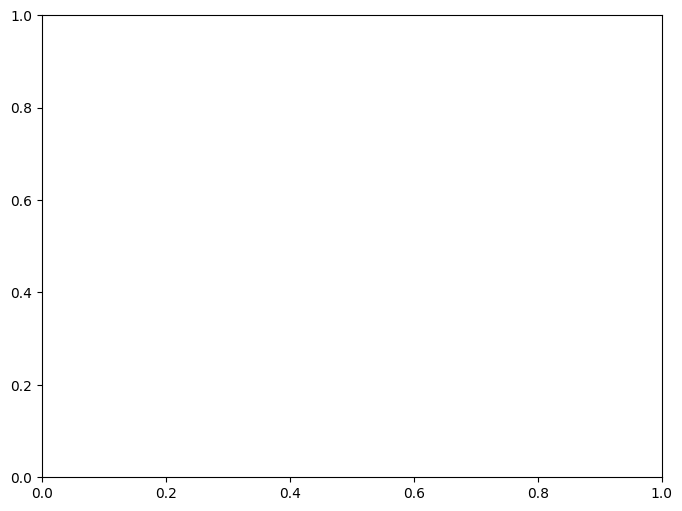

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    conf_matrix = np.zeros((3, 3))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1
    return accuracy, np.std(y_pred == y_true), conf_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Holdout com 20 realizações
n_realizations = 20
accuracies_linear = []
accuracies_quadratic = []
for _ in range(n_realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Calcular class priors
    class_priors = np.bincount(y_train) / len(y_train)

    # Calcular class means e variances
    class_means = [np.mean(X_train[y_train == i], axis=0) for i in range(3)]
    class_variances = [np.cov(X_train[y_train == i].T) for i in range(3)]

    # Função de previsão para discriminante linear
    def predict_linear(X):
        predictions = []
        for x in X:
            class_scores = [np.log(class_priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * class_variances[i]))
                            - 0.5 * np.sum(((x - class_means[i]) ** 2) / class_variances[i]) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Função de previsão para discriminante quadrático
    def predict_quadratic(X):
        predictions = []
        for x in X:
            class_scores = [-0.5 * np.dot(np.dot((x - class_means[i]).T, np.linalg.inv(class_variances[i])), (x - class_means[i])) for i in range(3)]
            predictions.append(np.argmax(class_scores))
        return predictions

    # Fazer previsões no conjunto de teste para discriminante linear
    y_pred_linear = predict_linear(X_test)

    # Calcular métricas para discriminante linear
    accuracy_linear, std_dev_linear, conf_matrix_linear = calculate_metrics(y_test, y_pred_linear)
    accuracies_linear.append((accuracy_linear, std_dev_linear, conf_matrix_linear))

    # Fazer previsões no conjunto de teste para discriminante quadrático
    y_pred_quadratic = predict_quadratic(X_test)

    # Calcular métricas para discriminante quadrático
    accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic = calculate_metrics(y_test, y_pred_quadratic)
    accuracies_quadratic.append((accuracy_quadratic, std_dev_quadratic, conf_matrix_quadratic))

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante linear
mean_accuracies_linear = np.mean([acc[0] for acc in accuracies_linear])
best_realization_index_linear = np.argmin(np.abs([acc[0] - mean_accuracies_linear for acc in accuracies_linear]))
best_accuracy_linear, best_std_dev_linear, best_conf_matrix_linear = accuracies_linear[best_realization_index_linear]

# Encontrar a melhor realização com base na acurácia mais próxima da média para discriminante quadrático
mean_accuracies_quadratic = np.mean([acc[0] for acc in accuracies_quadratic])
best_realization_index_quadratic = np.argmin(np.abs([acc[0] - mean_accuracies_quadratic for acc in accuracies_quadratic]))
best_accuracy_quadratic, best_std_dev_quadratic, best_conf_matrix_quadratic = accuracies_quadratic[best_realization_index_quadratic]

# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index_linear}")
print(f"Acurácia: {best_accuracy_linear:.4f}")
print(f"Desvio Padrão: {best_std_dev_linear:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_linear)

# Imprimir os resultados do discriminante quadrático para a melhor realização
print("\nResultados do Discriminante Quadrático:")
print(f"Melhor Realização: {best_realization_index_quadratic}")
print(f"Acurácia: {best_accuracy_quadratic:.4f}")
print(f"Desvio Padrão: {best_std_dev_quadratic:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix_quadratic)





# Imprimir os resultados do discriminante linear para a melhor realização
print("Resultados do Discriminante Linear:")
print(f"Melhor Realização: {best_realization_index}")
print(f"Acurácia: {best_accuracy:.4f}")
print(f"Desvio Padrão: {best_std_dev:.4f}")
print("Matriz de Confusão:")
print(best_conf_matrix)
print("Covariance Matrix (Complete):")
print(np.cov(best_X_train.T))
print("Covariance Matrix (Diagonal):")
print(np.diag(np.diag(np.cov(best_X_train.T))))
print("Covariance Matrix (Equal):")
print(np.mean(np.cov(best_X_train.T)) * np.eye(best_X_train.shape[1]))

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, means, variances, priors, ax):
    h = 0.02  # Passo do grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, variances, priors)
    Z = np.array(Z).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Função de previsão
def predict(X, means, variances, priors):
    predictions = []
    for x in X:
        class_scores = [np.log(priors[i]) - 0.5 * np.sum(np.log(2 * np.pi * variances[i]))
                        - 0.5 * np.sum(((x - means[i][:2]) ** 2) / variances[i][:2]) for i in range(3)]
        predictions.append(np.argmax(class_scores))
    return predictions

# Dados para plotagem
X_plot = best_X_train[:, :2]  # Usando apenas as duas primeiras características
y_plot = y_train

# Plotagem
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_surface(X_plot, y_plot, class_means, class_variances, class_priors, ax)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Dataset - IRIS\nSuperfície de Decisão - Melhor Realização')
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define custom colors for training and test points
train_colors = ['gold', 'limegreen', 'royalblue']
test_color = 'black'

def plot_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], c=train_colors[i], marker='o', label=f'{iris.target_names[i]} (Treinamento)', edgecolors='k', s=80)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Teste', edgecolors='k', s=80)
    plt.xlabel('Comprimento da Sépala')
    plt.ylabel('Largura da Sépala')
    plt.title('Dataset - IRIS\nConjuntos de Dados de Treinamento e Teste')

    # Adicionando uma legenda personalizada com nomes de espécies
    custom_lines = [Line2D([0], [0], marker='o', color='w', label=f'{iris.target_names[i]} (Treinamento)', markerfacecolor=train_colors[i], markersize=10) for i in range(3)]
    custom_lines.append(Line2D([0], [0], marker='x', color='black', label='Teste', markersize=10))
    plt.legend(handles=custom_lines, loc='upper right')

    plt.show()

# Usar a função para plotar os conjuntos de dados de treinamento e teste
plot_dataset(X_train, y_train, X_test, y_test)